[Stable diffusion VAE encoder/decoder example](https://keras.io/examples/generative/finetune_stable_diffusion/)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras_cv
import tensorflow as tf
from keras_cv.models.stable_diffusion.image_encoder import ImageEncoder
from keras_cv.models.stable_diffusion.decoder import Decoder
from tensorflow import keras

2023-03-03 15:56:38.834430: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-03 15:56:39.542462: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-03 15:56:39.542518: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-03 15:56:39.542525: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

You do not have Waymo Open Dataset installed, so KerasCV Waymo metrics are not available.


In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
physical_devices

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
keras.mixed_precision.set_global_policy("mixed_float16")

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 2060, compute capability 7.5


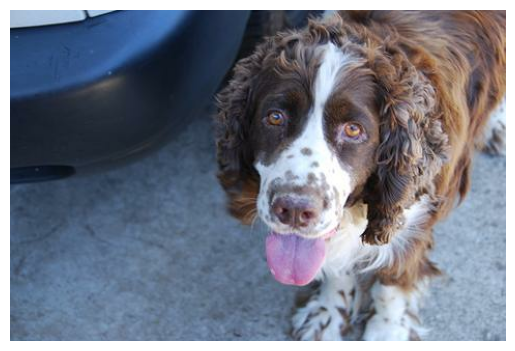

In [8]:
b = tf.io.read_file("imagenette/train/n02102040/ILSVRC2012_val_00000665.JPEG")
x = tf.io.decode_jpeg(b)
plt.imshow(x); plt.axis('off');

In [14]:
image_encoder = ImageEncoder(320, 479)
vae = tf.keras.Model(
    image_encoder.input,
    image_encoder.output)

In [15]:
vae(tf.expand_dims(x,axis=0))

<tf.Tensor: shape=(1, 40, 60, 4), dtype=float16, numpy=
array([[[[ 8.7219e-02,  4.4922e-02, -3.7842e-02, -2.4857e-02],
         [ 8.0017e-02,  4.5319e-02,  2.4582e-02,  3.1128e-02],
         [ 1.4795e-01,  3.1830e-02,  2.7878e-02,  5.7526e-02],
         ...,
         [ 9.3201e-02,  1.4587e-02,  1.6022e-02, -3.0689e-03],
         [ 9.1980e-02,  1.7944e-02,  1.3260e-02, -3.4676e-03],
         [ 8.6609e-02,  1.1986e-02,  2.0645e-02, -5.7373e-03]],

        [[-3.6896e-02, -6.2439e-02,  3.8452e-02, -9.8999e-02],
         [ 5.2856e-02,  7.5134e-02,  5.0659e-02, -3.8391e-02],
         [ 5.6702e-02,  4.0588e-02,  5.2460e-02, -7.2937e-03],
         ...,
         [ 1.0376e-01,  1.1299e-02,  1.4061e-02, -4.0007e-04],
         [ 9.7046e-02, -1.1454e-03,  1.4397e-02, -1.3161e-02],
         [ 9.6069e-02,  3.6591e-02, -1.2863e-02, -1.7380e-02]],

        [[-4.7119e-02,  1.7426e-02,  2.9297e-02, -1.0120e-01],
         [ 8.6853e-02,  2.3209e-02, -1.1108e-02, -4.8187e-02],
         [ 4.5197e-02,  4.7119